# Student Performance Indicator

## Lifecycle of a Machine Learning Project

1. Understanding the Problem --defining the problem statement and objectives of the project.
2. Data Collection --from web scraping, databases and api.
3. EDA
4. Data Preprocessing --feature engg and feature selection
5. Model Building
6. Model Hyperparameter Tuning
7. Model Deployment
8. Retraining Approach

### 1. Problem statement 
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test Preparation Course.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2. Data Collection

In [13]:
# importing the dataset
df = pd.read_csv("data/StudentsPerformance.csv")

print(df.shape, end="\n\n\n")
print(df.head())

(1000, 8)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


Dataset Information:-

i.      gender: sex of students-> categorical (male/female)

ii.     race/ethnicity: ethnicity of the students -> categorical (Group A,B,C,D,E)

iii.    parental level of education: parent's final education -> categorical (bachelor's degree, some college, master's degree, associate's degree, high school)

iv.     lunch: having lunch before test (standard or free/reduced)

v.      test preparation course: complete or not complete before test

vi.     math score

vii.    reading score

viii.   writing score


### 3. Exploratory Data Analysis

### EDA- Part I (Data Checks to Perform)

i.      Check Missing Values

ii.     Check Duplicates

iii.    Check Data Type

iv.     Check the number of unique values of each column

v.      Check statistics of data set

vi.     Check various categories present in the different categorical column

In [16]:
#   checking missing values

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Observation No.01: There are no missing values in the dataset.

In [19]:
#   checking duplicates

df.duplicated().sum()

0

Observation No.02:  There are no duplicate values in the dataset.

In [22]:
#   checking the Null and Dtypes
#   i.e., checking which columns contains categorical values and which column contains categorical values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Observation No.03: Out of 8 columns, first 5 columns contains categorical values and last 3 columns contains numerical values.

In [23]:
#   checking the number of unique values of each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [28]:
#   check statistics
#   i.e., getting the statistical analysis of the dataset for the columns containing numerical values only.

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
1. All means are very close to each other- between 66 and 68.05
2. All standard deviations are also very close to each other- between 14.6 and 15.19
3. For writing minimum is much higher as= 10 and for reading minimum is much higher as=17

In [36]:
#   Exploring the data
#   Checking various categories present in various categorical columns.

print("Various categories in 'gender' variable:")
print(df.gender.unique(), end="\n\n\n")

print("Various categories in 'race/ethnicity' variable:")
print(df['race/ethnicity'].unique(), end="\n\n\n")

print("Various categories in 'parental level of education' variable:")
print(df['parental level of education'].unique(), end="\n\n\n")

print("Various categories in 'lunch' variable:")
print(df.lunch.unique(), end="\n\n\n")

print("Various categories in 'test preparation course' variable:")
print(df['test preparation course'].unique(), end="\n\n\n")


Various categories in 'gender' variable:
['female' 'male']


Various categories in 'race/ethnicity' variable:
['group B' 'group C' 'group A' 'group D' 'group E']


Various categories in 'parental level of education' variable:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Various categories in 'lunch' variable:
['standard' 'free/reduced']


Various categories in 'test preparation course' variable:
['none' 'completed']




#### 3.7 Splitting categorical features and numerical features

In [37]:
#   creating a list of numerical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(numeric_features)

['math score', 'reading score', 'writing score']


In [38]:
#   creating a list of categorical features

categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print(categorical_feature)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [41]:
#   printing the result

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_feature), categorical_feature))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 4. Feature Engineering

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
# creating two dependent features- 'total score' and 'average'

df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"]/3

In [44]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
#   Number of students full marks in each subject

reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

In [52]:
#   Number of students with less than 20 marks in each subject

reading_20 = df[df['reading score']<20]['average'].count()
writing_20 = df[df['writing score']<20]['average'].count()
math_20 = df[df['math score']<20]['average'].count()

In [54]:
#   printing the information

print("There are {},{} and {} number of students with full marks in Reading, Writing and Maths".format(reading_full, writing_full, math_full))
print("There are {},{} and {} number of students with less than 20 marks in Reading, Writing and Maths".format(reading_20, writing_20, math_20))

There are 17,14 and 7 number of students with full marks in Reading, Writing and Maths
There are 1,3 and 4 number of students with less than 20 marks in Reading, Writing and Maths


Insights-
1. From above values we get students have performed the worst in Maths.
2. The best performance of students is observed in reading section.

### EDA- Part II (Data Visualization)

#### 3.8 Visualize average score distribution to make some conclusion.
i.  Histogram

ii. Kernel Distribution Function(KDE)

<function matplotlib.pyplot.show(close=None, block=None)>

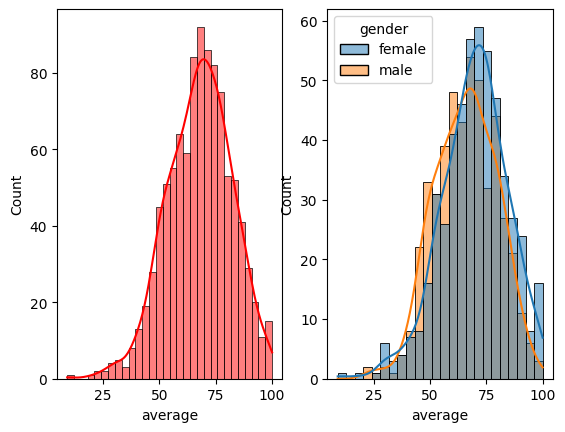

In [67]:
#   Histogram

plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde= True, color='r')

plt.subplot(122)
sns.histplot(data=df, x='average', kde= True, hue='gender')

plt.show

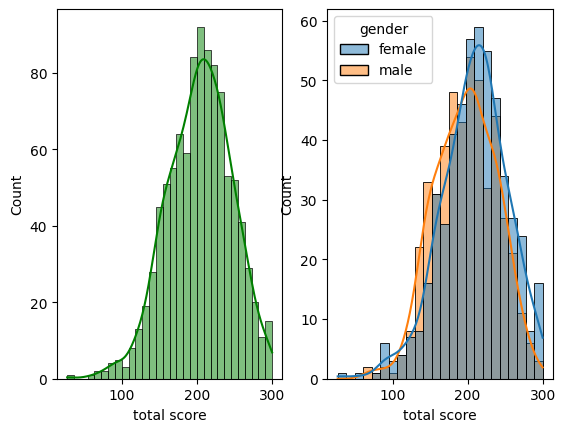

In [68]:
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde= True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total score', kde= True, hue='gender')

plt.show()

Insights-
Female students tends to perform well than male students.

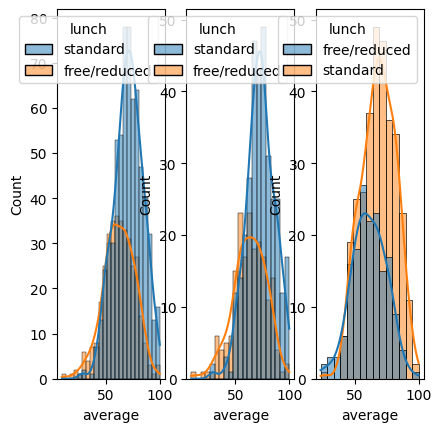

In [66]:
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

plt.show()

Insights-
1. Standard lunch helps to perform well in exams.
2. Standard lunch helps perform well in exams, be it female or male.